# Book Recommender System with Keras

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
books_df = pd.read_csv('books_enriched.csv')
books_ratings = pd.read_csv('ratings.csv')
books_ratings.drop_duplicates(inplace=True)
print('we have', books_ratings.shape[0], 'ratings')
books_ratings.head()

we have 5976479 ratings


,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [3]:
books_df.head()

,Unnamed: 0,index,authors,average_rating,best_book_id,book_id,books_count,description,genres,goodreads_book_id,...,ratings_3,ratings_4,ratings_5,ratings_count,small_image_url,title,work_id,work_ratings_count,work_text_reviews_count,authors_2
0,0,0,['Suzanne Collins'],4.34,2767052,1,272,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,"['young-adult', 'fiction', 'fantasy', 'science...",2767052,...,560092,1481305,2706317,4780653,https://images.gr-assets.com/books/1447303603s...,"The Hunger Games (The Hunger Games, #1)",2792775,4942365,155254,['Suzanne Collins']
1,1,1,"['J.K. Rowling', 'Mary GrandPré']",4.44,3,2,491,Harry Potter's life is miserable. His parents ...,"['fantasy', 'fiction', 'young-adult', 'classics']",3,...,455024,1156318,3011543,4602479,https://images.gr-assets.com/books/1474154022s...,Harry Potter and the Sorcerer's Stone (Harry P...,4640799,4800065,75867,"['J.K. Rowling', 'Mary GrandPré']"
2,2,2,['Stephenie Meyer'],3.57,41865,3,226,About three things I was absolutely positive.\...,"['young-adult', 'fantasy', 'romance', 'fiction...",41865,...,793319,875073,1355439,3866839,https://images.gr-assets.com/books/1361039443s...,"Twilight (Twilight, #1)",3212258,3916824,95009,['Stephenie Meyer']
3,3,3,['Harper Lee'],4.25,2657,4,487,The unforgettable novel of a childhood in a sl...,"['classics', 'fiction', 'historical-fiction', ...",2657,...,446835,1001952,1714267,3198671,https://images.gr-assets.com/books/1361975680s...,To Kill a Mockingbird,3275794,3340896,72586,['Harper Lee']
4,4,4,['F. Scott Fitzgerald'],3.89,4671,5,1356,Alternate Cover Edition ISBN: 0743273567 (ISBN...,"['classics', 'fiction', 'historical-fiction', ...",4671,...,606158,936012,947718,2683664,https://images.gr-assets.com/books/1490528560s...,The Great Gatsby,245494,2773745,51992,['F. Scott Fitzgerald']


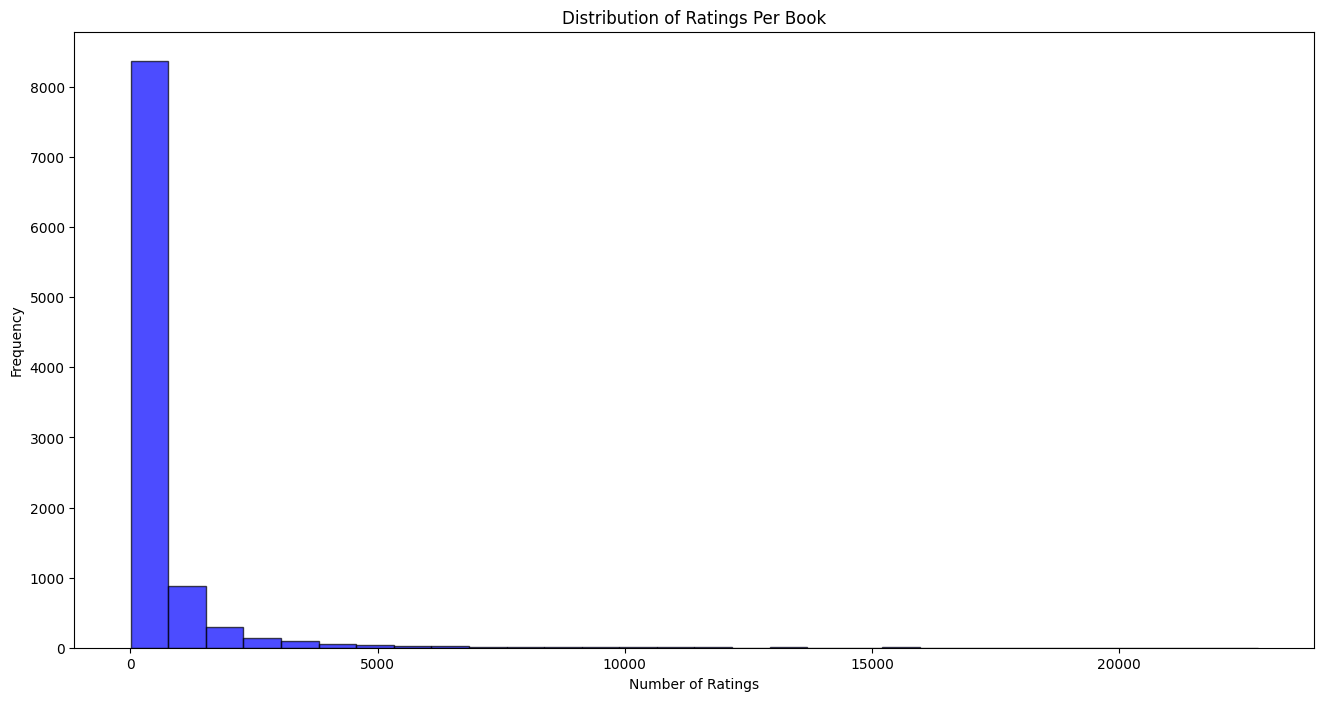

In [4]:
no_of_ratings_per_book = books_ratings.groupby('book_id').count()

# Set up the figure size
plt.figure(figsize=(16,8))

# Plot the histogram
plt.hist(no_of_ratings_per_book['rating'], bins=30, color='blue', edgecolor='black', alpha=0.7)

# Adding labels and title for clarity
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings Per Book')

# Show the plot
plt.show()

**The user_id and book_id in the dataset are currently non-sequential, it is required to convert them into sequential (starting from 0). Scikit-learn's LabelEncoder class helps to transform the fields.**

In [5]:
#user
user_enc = LabelEncoder() # converts categorical labels (user ids) into numeric labels 
books_ratings['user'] = user_enc.fit_transform(books_ratings['user_id'].values) # The method both fits and transforms the user_id column of the books_ratings DataFrame. 
# It encodes unique user IDs into integers starting from 0 and stores the results in a new column, user.
n_users = books_ratings['user'].nunique() #counts the distinct values

#book
item_enc = LabelEncoder() # converts categorical labels (book ids) into numeric labels 
books_ratings['book'] = item_enc.fit_transform(books_ratings['book_id'].values)
n_books = books_ratings['book'].nunique()

books_ratings['rating'] = books_ratings['rating'].values.astype(np.float32) #The method converts the rating column to 32-bit floating point numbers. 
# This ensures consistent data type for subsequent operations.

min_rating = min(books_ratings['rating'])
max_rating = max(books_ratings['rating'])

print('the number of unique users we have is ', n_users)
print('the number of unique books we have is ', n_books)
print('The median user rated %d books.'%books_ratings.user_id.value_counts().median())
print('The max rating is: %d'%max_rating, "the min rating is: %d"%min_rating)
books_ratings.tail()

the number of unique users we have is  53424
the number of unique books we have is  10000
The median user rated 111 books.
The max rating is: 5 the min rating is: 1


,user_id,book_id,rating,user,book
5976474,49925,510,5.0,49924,509
5976475,49925,528,4.0,49924,527
5976476,49925,722,4.0,49924,721
5976477,49925,949,5.0,49924,948
5976478,49925,1023,4.0,49924,1022


**Split into training and test sets, with an 80-20 split.**

In [6]:
X = books_ratings[['user', 'book']].values # Selects the user and book columns and converts them to a NumPy array using .values.
# X represents the input features for the model, where each row corresponds to a (user, book) pair.
y = books_ratings['rating'].values # This line converts the rating column into a NumPy array.
# y represents the output labels for the model, corresponding to the ratings given by users for specific books.
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, # test data should be 20% of the original data
                                                    random_state=42 # ensures reproducibility by setting a seed for random number generation
                                                   )
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4781183, 2), (1195296, 2), (4781183,), (1195296,))

In [7]:
n_factors = 20 # Number of factors per user/book (hyperparameter)
X_train_array = [X_train[:, 0], # extracts the first column (users)
                 X_train[:, 1]] # extracts the second column (representing books)
X_test_array = [X_test[:, 0], X_test[:, 1]]

**Define the model**

In [8]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Reshape, Dot, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

In [9]:
def RecommenderNet(n_users, n_books, n_factors):
    user = Input(shape=(1,)) # each input will be a single integer representing an user ID
    u = Embedding(n_users, # size of the vocabulary (total number of unique users)
                  n_factors, # output dimension (number of latent factors)
                  embeddings_initializer='he_normal', # initializes the embedding weights using He initialization
                  embeddings_regularizer=l2(1e-6))(user) # applies L2 regularization to the embedding weights; (user) means the input is fed into this layer.
    u = Reshape((n_factors,))(u) # the output is reshaped to match the latent factors, making it a vector of size n_factors

    book = Input(shape=(1,))
    m = Embedding(n_books, n_factors, embeddings_initializer='he_normal', 
                 embeddings_regularizer=l2(1e-6))(book)
    m = Reshape((n_factors,))(m)

    x = Dot(axes=1)([u, m]) # the dot product is taken along the last axis (axes=1), which effectively calculates the similarity score between the user and book embeddings.
    model = Model(inputs=[user, book], outputs=x) # define a Keras model which takes two inputs (user and book) and produces a single output (x), which represents the predicted rating.
    opt = Adam(learning_rate=0.001) # create an Adam optimizer with a specified learning rate.
    model.compile(loss='mean_squared_error', optimizer=opt) # compile the model with a loss function and optimizer
    return model

In [10]:
model = RecommenderNet(n_users, n_books, n_factors)
model.summary() # provides a detailed description of the model's layers, their output shapes, and the number of parameters in each layer

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 1, 20)     │  1,068,480 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 1, 20)     │    200,000 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 20)        │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_1 (Reshape) │ (None, 20)        │          0 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dot (Dot)           │ (None, 1)         │          0 │ reshape[0][0],    │
│                     │                   │            │ reshape_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,268,480 (4.84 MB)

 Trainable params: 1,268,480 (4.84 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(x=X_train_array, y=y_train, 
                    batch_size=64, # number of samples per batch of computation
                    epochs=5, # number of times to iterate over the training data arrays.
                    verbose=1, # progress messages are printed during training
                    validation_data=(X_test_array, y_test)) # used to monitor the model’s performance on unseen data during training

Epoch 1/5
74706/74706 ━━━━━━━━━━━━━━━━━━━━ 359s 5ms/step - loss: 6.2728 - val_loss: 1.0519
Epoch 2/5
74706/74706 ━━━━━━━━━━━━━━━━━━━━ 350s 5ms/step - loss: 1.0334 - val_loss: 1.0206
Epoch 3/5
74706/74706 ━━━━━━━━━━━━━━━━━━━━ 325s 4ms/step - loss: 0.9963 - val_loss: 1.0094
Epoch 4/5
74706/74706 ━━━━━━━━━━━━━━━━━━━━ 331s 4ms/step - loss: 0.9727 - val_loss: 0.9980
Epoch 5/5
74706/74706 ━━━━━━━━━━━━━━━━━━━━ 337s 5ms/step - loss: 0.9523 - val_loss: 0.9885


**Taking a look at the model performance, it has performed well. More epoch would only cause the model to overfit.**

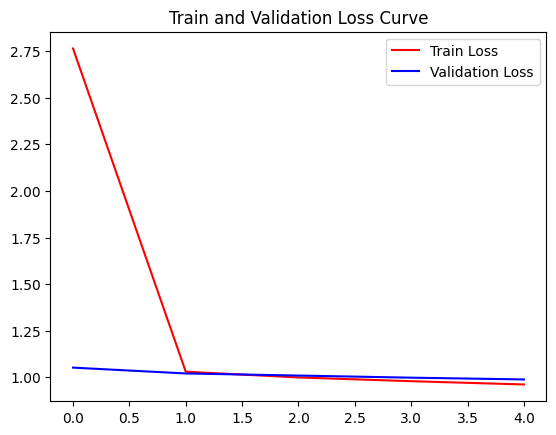

In [12]:
train_loss = history.history['loss'] # extracts the list of training loss values across epochs
val_loss = history.history['val_loss'] # extracts the list of validation loss values across epochs
plt.plot(train_loss, color='r', label='Train Loss')
plt.plot(val_loss, color='b', label='Validation Loss')
plt.title("Train and Validation Loss Curve")
plt.legend()
plt.show()

**The embedding layer can be extracted and visalised.**

In [13]:
book_em = model.get_layer('embedding_1') # retrieves the book embedding layer from the trained model
book_em_weights = book_em.get_weights()[0] # extracts the weights from the book embedding layer
book_em_weights.shape

(10000, 20)

In [14]:
from sklearn.decomposition import PCA
# PCA stands for Principal Component Analysis, which is a statistical procedure used to transform high-dimensional data into a 
# lower-dimensional space.

In [15]:
pca = PCA(n_components=2) # the data will be reduced to two dimensions
pca_result = pca.fit_transform(book_em_weights) # apply the PCA model to the book embedding weights
# the result pca_result will be an array with shape (n_books, 2), where n_books is the number of unique books, 
# and the two columns represent the first two principal components

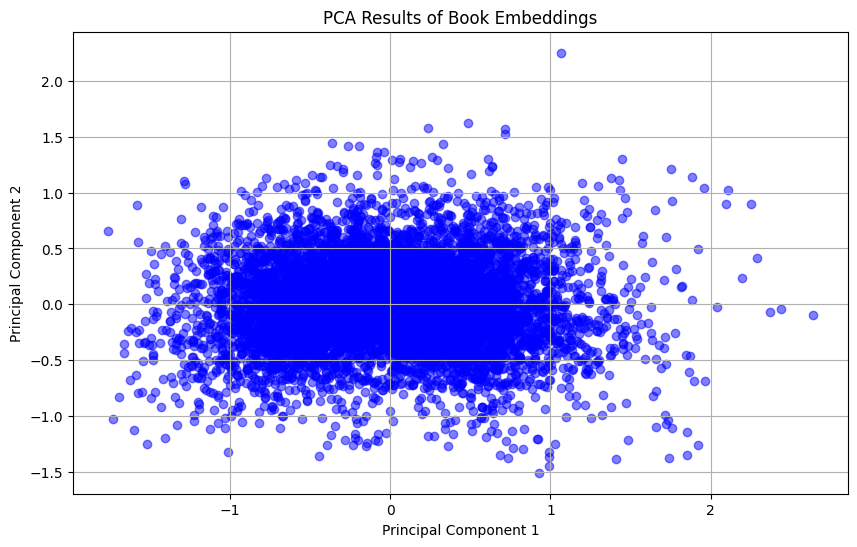

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5, color='blue')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Results of Book Embeddings')
plt.grid(True) 
plt.show()

# Making Recommendations

## User-based

**We can use the model to predict the top 10 recommendations for a user**

In [17]:
from IPython.display import Image, HTML
def recommend_books_for_user(user_id, books_info, books_ratings, model, k=10):
    """
    Recommends books for a given user.

    Parameters:
    - user_id: The ID of the user for whom to recommend books.
    - books_info: A DataFrame containing book information (including 'title' and 'small_image_url').
    - books_ratings: A DataFrame containing user ratings of books (including 'user_id' and 'book_id').
    - model: The trained Keras model used for recommendations.
    - k: The number of book recommendations to provide (default is 10).

    Returns:
    - HTML representation of the recommended books with images.
    """
    try:
        # Find the books rated by the user
        user_ratings = books_ratings[books_ratings['user_id'] == user_id]

        # Get all unique book IDs
        book_ids = np.array(books_ratings['book_id'].unique())

        # Create input arrays for prediction
        user_ids = np.full_like(book_ids, fill_value=user_id)
        book_ids_input = book_ids

        # Make predictions
        pred = model.predict([book_ids_input, user_ids]).flatten()

        # Get the top k book IDs based on predictions
        top_k_indices = (-pred).argsort()[:k]
        top_k_books = books_info.iloc[top_k_indices]

        # Prepare the display DataFrame
        displ = top_k_books[['title', 'small_image_url']]
        displ.set_index('title', inplace=True)

        # Function to display images in HTML
        def path_to_image_html(path):
            return '<img src="'+ path + '""/>'

        # Create HTML representation
        html = displ.to_html(escape=False, formatters={'small_image_url': path_to_image_html}, justify='center')
        return HTML(html)

    except Exception as e:
        return HTML(f"<p>An error occurred: {e}</p>")

user_id = 8000
html_output = recommend_books_for_user(user_id, books_df, books_ratings, model, k=10)
display(html_output)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step


,small_image_url
title,
The Sicilian,
Hot Water Music,
The Zookeeper's Wife,
"The Gamble (Colorado Mountain, #1)",
The Complete Robot (Robot #0.3),
"The Midwife's Revolt (The Midwife Series, #1)",
"The Blackhouse (Lewis Trilogy, #1)",
Close Encounters Of The Third Kind,
"Three Men in a Boat (Three Men, #1)",


## Item-based

In [18]:
def recommend_books_for_title(title, books_df, books_ratings, model, k=10):
    # Find the book ID
    book_id = books_df[books_df['title'].str.contains(title, case=False)].index[0]

    # Get all unique user IDs
    user_ids = np.array(books_ratings['user'].unique())

    # Create input arrays for prediction
    book_ids_input = np.full_like(user_ids, fill_value=book_id)
    user_ids_input = user_ids

    # Make predictions
    pred = model.predict([user_ids_input, book_ids_input]).flatten()

    # Get the top k user IDs based on predictions
    top_k_indices = (-pred).argsort()[:k]
    top_k_users = user_ids[top_k_indices]

    # Now predict for these top k users for all books
    all_book_ids = np.array(books_ratings['book'].unique())
    recommendations = []

    for user in top_k_users:
        user_array = np.full_like(all_book_ids, fill_value=user)
        predictions = model.predict([user_array, all_book_ids]).flatten()
        top_books_indices = (-predictions).argsort()[:k]
        top_books = books_df.iloc[top_books_indices]
        recommendations.append(top_books)

    # Combine and display the results
    result = pd.concat(recommendations).drop_duplicates().head(k)
    displ = result[['title', 'small_image_url']]
    displ.set_index('title', inplace=True)

    # Function to display images in HTML
    def path_to_image_html(path):
        return '<img src="' + path + '" width="100"/>'

    # Create HTML representation
    html = displ.to_html(escape=False, formatters={'small_image_url': path_to_image_html}, justify='center')
    return HTML(html)

# Example usage:
html_output = recommend_books_for_title("1984", books_df, books_ratings, model, k=10)
display(html_output)

1670/1670 ━━━━━━━━━━━━━━━━━━━━ 0s 211us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 216us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 212us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 213us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 222us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 221us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 222us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 219us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step


,small_image_url
title,
How the García Girls Lost Their Accents,
Calling Doctor Amelia Bedelia,
The Third Chimpanzee: The Evolution and Future of the Human Animal,
The Woman Who Stole My Life,
"The Initiation / The Captive Part I (The Secret Circle, #1-2)",
"The Black Unicorn (Magic Kingdom of Landover, #2)",
"The Highlander's Touch (Highlander, #3)",
The Complete Adventures of Curious George,
Outer Dark,


In [19]:
from sklearn.metrics import mean_squared_error
from math import sqrt
predicted_ratings = model.predict(X_test_array)
#tolerance = 0.5
#accurate_predictions = np.abs(predicted_ratings - y_test) <= tolerance
#accuracy = np.mean(accurate_predictions)
#print(f'Accuracy: {accuracy * 100:.2f}%')
# Calculate RMSE
rmse = sqrt(mean_squared_error(y_test, predicted_ratings))
print(f"Root Mean Squared Error: {rmse}")

37353/37353 ━━━━━━━━━━━━━━━━━━━━ 8s 219us/step
Root Mean Squared Error: 0.8900666745531745
